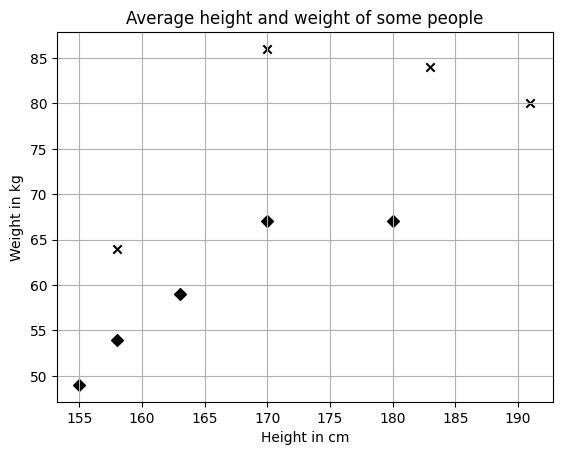

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']
plt.figure()
plt.title('Average height and weight of some people')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i]=='male' else 'D')
plt.grid(True)
plt.show()


NOW FIND NEAREST NEIGHBORS


In [5]:
x=np.array([155,70])
distances=np.sqrt(np.sum((X_train-x)**2,axis=1))
#axis=1 means along the row 
nearest_neighbors_indices=distances.argsort()[:3] #choose 3 nearst neighbors
nearest_neighbor_genders=np.take(y_train,nearest_neighbors_indices)



['male' 'female' 'female']


In [10]:
from collections import Counter
b=Counter(np.take(y_train,distances.argsort()[:3]))
print(b.most_common(1)[0]) #b.most_common(n) choose the n most common neighbors
print(b.most_common(1)[0][0])

('female', 2)
female


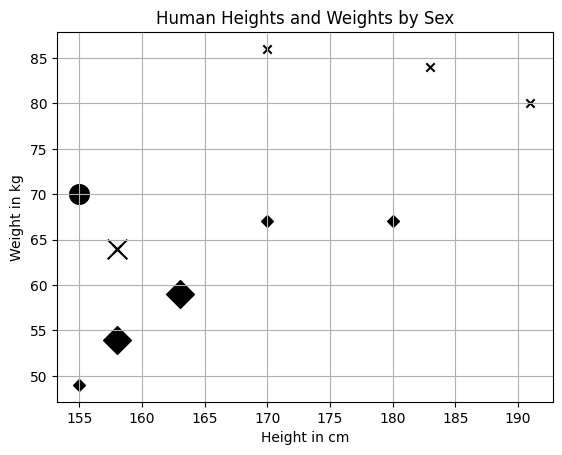

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')    
plt.grid(True)
plt.show()

In [22]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
lb=LabelBinarizer()
y_trainbinarized=lb.fit_transform(y_train)
print(y_trainbinarized)
print(y_trainbinarized.reshape(1,-1))


[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[1 1 1 1 0 0 0 0 0]]


In [61]:
K=3
clf=KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_trainbinarized.reshape(-1))
print(np.array([155,70]).reshape(1,-1))
prediction_binarized=clf.predict(np.array([155,70]).reshape(1,-1))[0]
print(prediction_binarized)
prediction_label=lb.inverse_transform(prediction_binarized)
print(prediction_label)

[[155  70]]
0
['female']


In [64]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test=['male','male','female','female']
y_test_binarized=lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T)

prediction_binarized=clf.predict(X_test)
print('Binarized predictions: %s' %prediction_binarized)
print('Predicted labels: %s' %lb.inverse_transform(prediction_binarized))

Binarized labels: [[1 1 0 0]]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [65]:
from sklearn.metrics import precision_score
print('Precision: %s' %precision_score(y_test_binarized,prediction_binarized))

Precision: 1.0


In [66]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,prediction_binarized))

Recall: 0.5


In [68]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized,prediction_binarized))

F1 score: 0.6666666666666666


In [70]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized,prediction_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, prediction_binarized,target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



#REGRESSION WITH KNN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]
K=3
clf=KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train,y_train)
predictions=clf.predict(np.array(X_test))
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))


Predicted weights: [70.66666667 79.         59.         70.66666667]
Actual weights: [65, 96, 52, 67]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


#SCALING FEATURES

In [7]:
from scipy.spatial.distance import euclidean
import numpy as np
# heights in millimeters
X_train = np.array([
[1700, 1],
[1600, 0]
])
x_test = np.array([1640, 1])
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

# heights in meters
X_train = np.array([
[1.7, 1],
[1.6, 0]
])
x_test = np.array([164, 1])
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.01249804748511
162.3
162.40307878855006
